In [1]:
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib import pyplot
from pandas import DataFrame
from numpy import log

In [5]:
df_delta = pd.read_excel(r'/Users/dilianaserafimova/Desktop/df_delta_clean.xlsx')

In [6]:
df_delta = df_delta.set_index(['date'])

# Holt-Winters

## 1) Training and test set

In [7]:
X = df_delta['pax_count']
size = int(len(X) * 0.8)
training_set, test_set = X[0:size], X[size:len(X)]
test_set.tail(10)

date
2019-03-01    10225163
2019-04-01     9759517
2019-05-01    10535619
2019-06-01    11009334
2019-07-01    11347299
2019-08-01    11187933
2019-09-01     9529576
2019-10-01    10131656
2019-11-01     9208786
2019-12-01     9917860
Name: pax_count, dtype: int64

In [8]:
training_set.tail(10)

date
2015-10-01    8733596
2015-11-01    8078228
2015-12-01    8077667
2016-01-01    7515655
2016-02-01    7250834
2016-03-01    8903105
2016-04-01    8594427
2016-05-01    9279824
2016-06-01    9529628
2016-07-01    9691761
Name: pax_count, dtype: int64

<AxesSubplot:xlabel='date'>

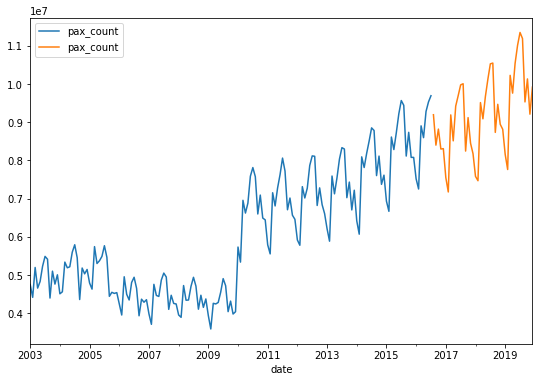

In [9]:
training_set.plot(figsize = (9,6), legend = True)
test_set.plot(legend = True)

## 2) Model

#### Multiplicative

In [10]:
fitted_model_mul = ExponentialSmoothing(training_set,
                             trend= 'mul',
                             seasonal = 'mul',
                             seasonal_periods= 12).fit()

/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


#### Additiv

In [11]:
fitted_model_add = ExponentialSmoothing(training_set,
                             trend= 'add',
                             seasonal = 'add',
                             seasonal_periods= 12).fit()

/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [12]:
print(fitted_model_mul.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                pax_count   No. Observations:                  163
Model:             ExponentialSmoothing   SSE                 15223942664198.836
Optimized:                         True   AIC                           4149.403
Trend:                   Multiplicative   BIC                           4198.903
Seasonal:                Multiplicative   AICC                          4154.153
Seasonal Periods:                    12   Date:                 Sat, 26 Nov 2022
Box-Cox:                          False   Time:                         13:21:50
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8889286                alpha                 True
smoothing_trend          

In [13]:
print(fitted_model_add.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                pax_count   No. Observations:                  163
Model:             ExponentialSmoothing   SSE                 15949865818397.408
Optimized:                         True   AIC                           4156.996
Trend:                         Additive   BIC                           4206.496
Seasonal:                      Additive   AICC                          4161.746
Seasonal Periods:                    12   Date:                 Sat, 26 Nov 2022
Box-Cox:                          False   Time:                         13:21:50
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.5707143                alpha                 True
smoothing_trend          

## 3) Forecast 

In [14]:
predictions_hw_mul = fitted_model_mul.forecast(steps = len(test_set)).rename("Holt-Winters")

/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [15]:
predictions_hw_mul.tail()

2019-08-01    1.066082e+07
2019-09-01    9.022986e+06
2019-10-01    9.771907e+06
2019-11-01    9.327896e+06
2019-12-01    9.770425e+06
Freq: MS, Name: Holt-Winters, dtype: float64

In [16]:
predictions_hw_add = fitted_model_add.forecast(steps = len(test_set)).rename("Holt-Winters")

In [17]:
predictions_hw_add.tail()

2019-08-01    9.978418e+06
2019-09-01    8.581887e+06
2019-10-01    9.033341e+06
2019-11-01    8.283753e+06
2019-12-01    8.399252e+06
Freq: MS, Name: Holt-Winters, dtype: float64

## 4) Visualization

<AxesSubplot:xlabel='date'>

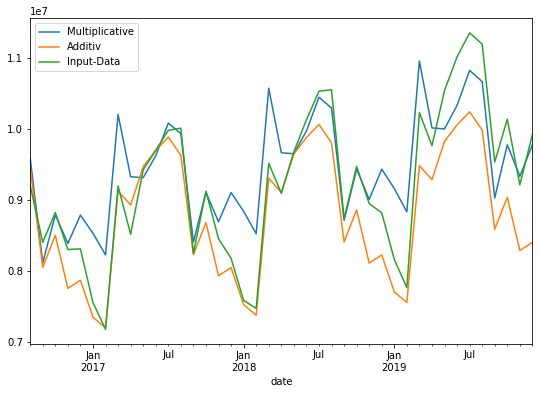

In [18]:
predictions_hw_mul.plot(legend = True, label = 'Multiplicative', figsize = (9,6))
predictions_hw_add.plot(legend = True, label = 'Additiv')
test_set.plot(legend = True, label = 'Input-Data')

## 5) Model assessment

#### MAE and RMSE

In [19]:
print(round(mean_absolute_error(test_set, predictions_hw_mul),2))


450512.48


In [20]:
print(round(mean_absolute_error(test_set, predictions_hw_add),2))

460551.1


In [21]:
print(round(np.sqrt(mean_squared_error(test_set, predictions_hw_mul)), 2))

589215.08


In [22]:
print(round(np.sqrt(mean_squared_error(test_set, predictions_hw_add)), 2))

594954.14


#### MAPE function

In [23]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred) / y_true) * 100

In [24]:
round(MAPE(test_set, predictions_hw_mul),2)

5.18

In [25]:
round(MAPE(test_set, predictions_hw_add),2)

4.81

## 6) Export Forecast

In [26]:
%cd  /Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/Delta

/Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/Delta


In [27]:
predictions_hw_mul.to_csv('predictions_hw_mul.csv', index = True)

In [28]:
predictions_hw_add.to_csv('predictions_hw_add.csv', index = True)